<a href="https://colab.research.google.com/github/AndresR2909/poc_deepseek_ocr/blob/main/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu118

In [2]:
# pip install vllm-0.8.5+cu118-cp38-abi3-manylinux1_x86_64.whl

In [3]:
# pip install -r /content/drive/MyDrive/poc_deekseek_ocr/requirements.txt

In [4]:
# pip install flash-attn==2.7.3 --no-build-isolation

In [5]:
#pip install addict

In [7]:
from transformers import AutoModel, AutoTokenizer
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, _attn_implementation='flash_attention_2', trust_remote_code=True, use_safetensors=True)
model = model.eval().cuda().to(torch.bfloat16)


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True


In [8]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\n<|grounding|>Convert the document to markdown. "
image_file = '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png'
output_path = '/content/drive/MyDrive/poc_deekseek_ocr/ouput_reporte_financiero.png'

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = True)

/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
<|ref|>sub_title<|/ref|><|det|>[[15, 66, 470, 105]]<|/det|>
# CemArgos: EBITDA afectado por deterioro contable 

<|ref|>sub_title<|/ref|><|det|>[[15, 157, 95, 185]]<|/det|>
## Operacional 

<|ref|>image<|/ref|><|det|>[[33, 240, 303, 840]]<|/det|>
 

<|ref|>sub_title<|/ref|><|det|>[[339, 157, 399, 185]]<|/det|>
## Ingresos 

<|ref|>image<|/ref|><|det|>[[359, 240, 978, 840]]<|/det|>
image size:  (1262, 702)
valid image tokens:  342
output texts tokens (valid):  118
compression ratio:  0.35
===============save results:===============


other: 100%|██████████| 3/3 [00:00<00:00, 46776.62it/s]


In [17]:
def perform_inference(model, tokenizer, prompt, image_file, output_path):
    """
    Performs inference using the model.infer method.

    Args:
        model: The model object.
        tokenizer: The tokenizer object.
        prompt: The prompt string.
        image_file: The path to the image file.
        output_path: The path to save the output.

    Returns:
        The result of the model.infer call.
    """
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=output_path,
        base_size=1024,
        image_size=640,
        crop_mode=True,
        save_results=True,
        test_compress=True
    )
    return res

## Create lists of prompts and images

In [18]:
prompts = [
    "<image>\nFree OCR.",
    "<image>\nConvert the document to markdown.",
    "<image>\nParse the figure.",
    "<image>\nidentify all objects in the image and output them in bounding boxes.",
    "<image>\nLocate <|ref|> icecream <|/ref|> in the image.",
    "<image>\nLocate <|ref|> X=6 <|/ref|> in the image.",
    "<image>\nDescribe this image in detail."
]

image_files = [
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png'
]

output_paths = [
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_ocr',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_markdown',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_2',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_minimalisto-salas-pequenas-modernas-1-jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_frame_video_3.png'
]

## Iterate and perform inference


In [19]:
inference_results = []
for prompt, image_file, output_path in zip(prompts, image_files, output_paths):
    print(f"Processing image: {image_file} with prompt: {prompt}")
    res = perform_inference(model, tokenizer, prompt, image_file, output_path)
    inference_results.append({
        'prompt': prompt,
        'image_file': image_file,
        'output_path': output_path,
        'result': res
    })
    print("Inference complete.")


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Free OCR.
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **4%**

- **-15%**

- **-15%**

- **-15%**

- **-15%**
- **-15%**

- **-15%**
- **-15%**
- **-15%**
- **-15%**
- 2T 2024
- 3T 2024
- 4T 2024
- 1T 2025
- 2T 2025
- 3T 2025
- 4T 2025
- 1T 2025
- 2T 2025
- 1T 2025
- 2T 2024
- 3T 2024
- 4t 2024
- 1t 2025
- 2t 2025
- 3t 2025
- 4t 2025
- 1t 2025
- 2t 2025
- 1t 2025
- 2t 2024
- 3t 2024
- 4t 2024
- 1t 2025

- **Ingresos**
- **COP mil mn**
- **EBITDA**
- **COP mil mn**

\[\begin{align*}
\text{COP mil mn} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Convert the document to markdown.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- **11\%* (A/A)**

- **$60 de deterioro**

### GRUPO ARGOS

- **Inversiones que transforman**
image size:  (1262, 702)
valid image tokens:  342
output texts tokens (

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png with prompt: <image>
Parse the figure.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2Q2025" which translates to "RESULTS OF THE GROUP ARGOS 2Q2025." The chart is divided into two main sections: "Flujo de Caja" (Cash Flow) and "Notas" (Notes).

In the "Flujo de Caja" section, there are two bars representing the cash flow for different categories. The first bar, labeled "Dividendos netos," shows a value of 270,676. The second bar, labeled "Ingresos NDU," indicates a value of 54,149. The third bar, labeled "Compra/venta acciones," has a value of 64,147. The fourth bar, labeled "Egresos GA," shows a value of 49,470. The fifth bar, labeled "Egresos NDU," indicates a value of 58,731. The sixth bar, labeled "Impuestos," has a value of 285,727. The seventh bar, labeled "FCO," shows a value of 61,087. The eighth bar, labeled "Intereses netos," indicates a value of 107,902. The ninth bar, labeled "Créditos netos," shows a value of 1,423. The tenth

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp with prompt: <image>
identify all objects in the image and output them in bounding boxes.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>Pillow<|/ref|><|det|>[[325, 505, 440, 655], [530, 520, 627, 655]]<|/det|>
<|ref|>Picture<|/ref|><|det|>[[0, 420, 193, 840], [384, 66, 643, 440]]<|/det|>
<|ref|>Potted Plant<|/ref|><|det|>[[647, 600, 711, 720], [860, 510, 980, 680]]<|/det|>
<|ref|>Couch<|/ref|><|det|>[[205, 504, 830, 905]]<|/det|>
<|ref|>Carpet<|/ref|><|det|>[[205, 870, 997, 996]]<|/det|>
<|ref|>Lamp<|/ref|><|det|>[[135, 0, 201, 351]]<|/det|>
<|ref|>Cabinet<|/ref|><|det|>[[863, 666, 997, 996]]<|/det|>
<|ref|>Dog<|/ref|><|det|>[[421, 520, 555, 722]]<|/det|>
image size:  (600, 400)
valid image tokens:  170
output texts tokens (valid):  189
compression ratio:  1.11
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 8/8 [00:00<00:00, 117734.85it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg with prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
<|ref|> icecream <|/ref|><|det|>[[80, 120, 150, 220], [170, 110, 240, 220], [475, 163, 540, 270], [700, 415, 760, 520], [820, 103, 876, 220]]<|/det|>
image size:  (1200, 747)
valid image tokens:  759
output texts tokens (valid):  68
compression ratio:  0.09
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 20164.92it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg with prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
<|ref|> X=6 <|/ref|><|det|>[[240, 777, 390, 968]]<|/det|>
image size:  (686, 386)
valid image tokens:  344
output texts tokens (valid):  21
compression ratio:  0.06
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 14614.30it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png with prompt: <image>
Describe this image in detail.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
A financial chart of the S&P 500 index. The chart is in a candlestick format, with each candlestick representing a one-day period. The candlesticks are color-coded based on the percentage change in the index's value. The chart is also annotated with several technical indicators, including the moving average convergence divergence (MACD) indicator and the relative strength index (RSI) indicator. The chart is set against a white background with a black grid. The font used in the chart is Arial.
image size:  (1383, 680)
valid image tokens:  325
output texts tokens (valid):  108
compression ratio:  0.33
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.


## Display results



--- Results for Inference 1 ---
Prompt: <image>
Free OCR.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **4%**

- **-15%**

- **-15%**

- **-15%**

- **-15%**
- **-15%**

- **-15%**
- **-15%**
- **-15%**
- **-15%**
- 2T 2024
- 3T 2024
- 4T 2024
- 1T 2025
- 2T 2025
- 3T 2025
- 4T 2025
- 1T 2025
- 2T 2025
- 1T 2025
- 2T 2024
- 3T 2024
- 4t 2024
- 1t 2025
- 2t 2025
- 3t 2025
- 4t 2025
- 1t 2025
- 2t 2025
- 1t 2025
- 2t 2024
- 3t 2024
- 4t 2024
- 1t 2025

- **Ingresos**
- **COP mil mn**
- **EBITDA**
- **COP mil mn**

\[\begin{align*}
\text{COP mil mn} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**
- **-5% (A/A)**
- **-5% (A/A)**

- **2Q2025 vs 2Q2024**
- **2Q2025 vs 2Q2024**
- **2Q2025**
- **2Q2024**
- **2Q2024**
- **2Q2024**
- **2Q204**
- **2Q204**
- **2Q204**
- **2Q204**


Image with Bounding Boxes:


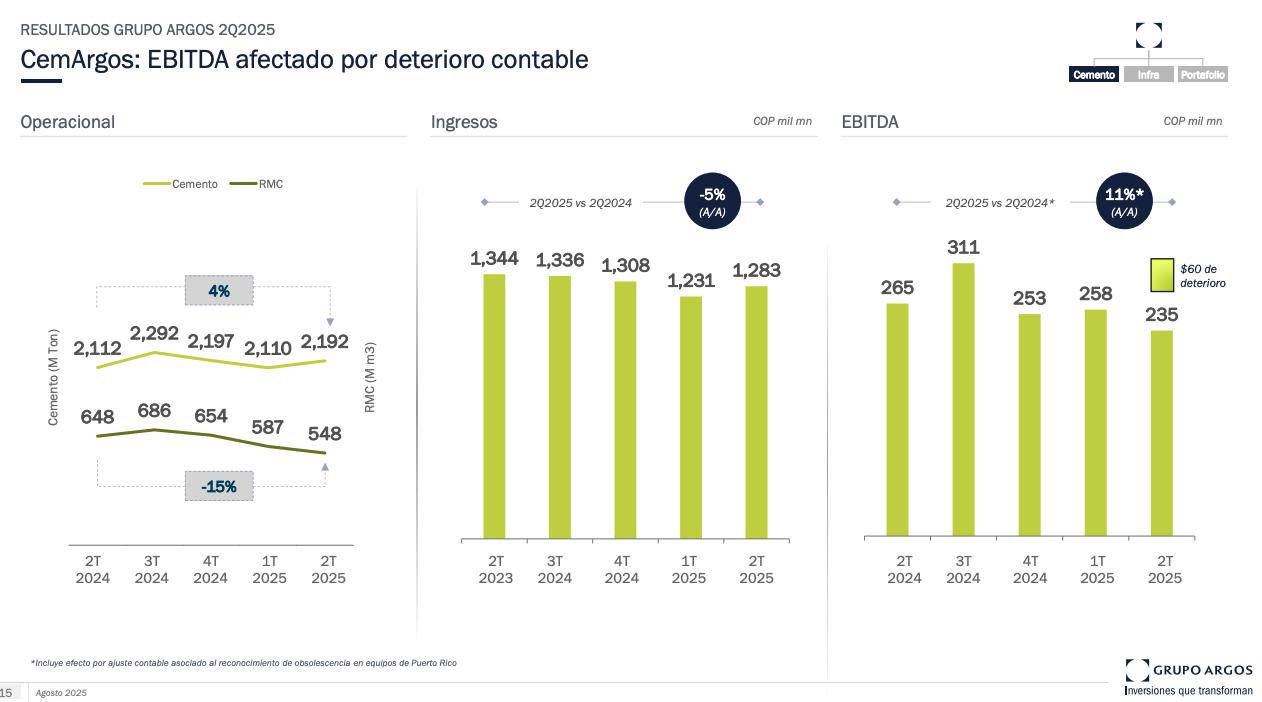


--- Results for Inference 2 ---
Prompt: <image>
Convert the document to markdown.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- **11\%* (A/A)**

- **$60 de deterioro**

### GRUPO ARGOS

- **Inversiones que transforman**


Image with Bounding Boxes:


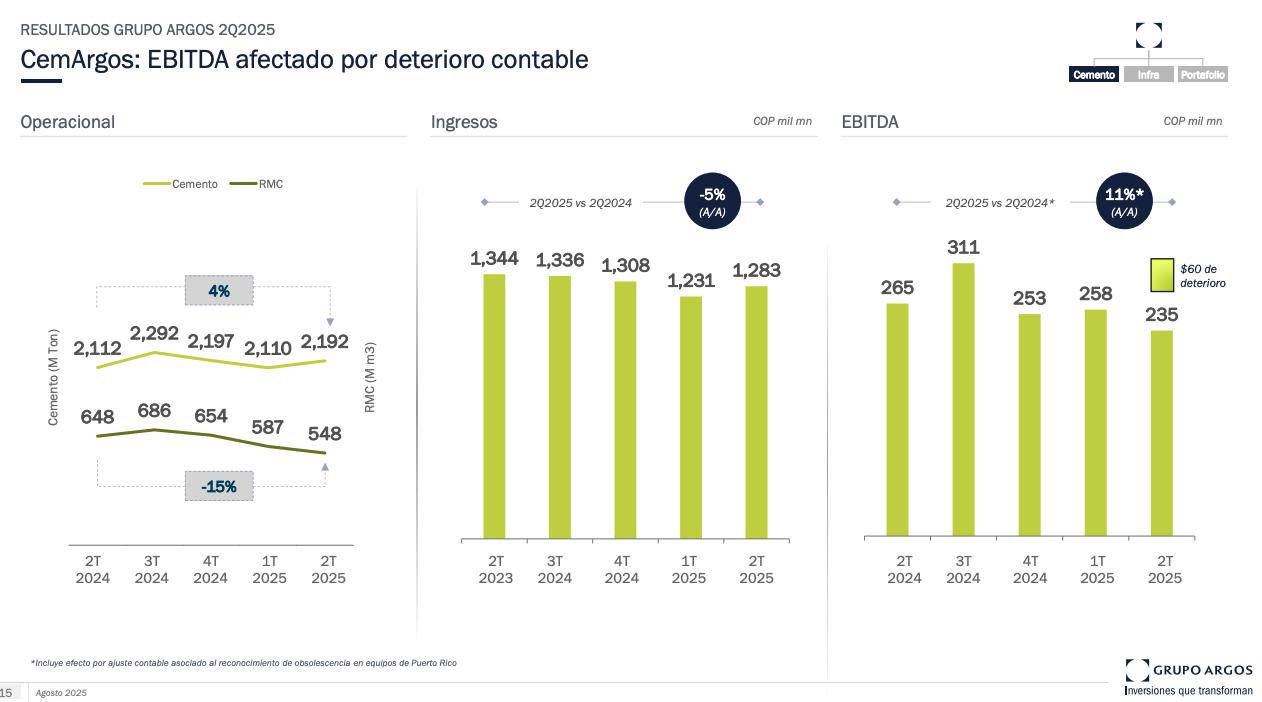


--- Results for Inference 3 ---
Prompt: <image>
Parse the figure.

Markdown Result:


The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2Q2025" which translates to "RESULTS OF THE GROUP ARGOS 2Q2025." The chart is divided into two main sections: "Flujo de Caja" (Cash Flow) and "Notas" (Notes).

In the "Flujo de Caja" section, there are two bars representing the cash flow for different categories. The first bar, labeled "Dividendos netos," shows a value of 270,676. The second bar, labeled "Ingresos NDU," indicates a value of 54,149. The third bar, labeled "Compra/venta acciones," has a value of 64,147. The fourth bar, labeled "Egresos GA," shows a value of 49,470. The fifth bar, labeled "Egresos NDU," indicates a value of 58,731. The sixth bar, labeled "Impuestos," has a value of 285,727. The seventh bar, labeled "FCO," shows a value of 61,087. The eighth bar, labeled "Intereses netos," indicates a value of 107,902. The ninth bar, labeled "Créditos netos," shows a value of 1,423. The tenth bar, labeled "Otros ing.- egr. neto," has a value of 1,423. The eleventh bar, labeled "Caja inicial (dic-24)," shows a value of 405,184. The twelfth bar, labeled "Caja final (jun-25)," indicates a value of 317,313.

In the "Notas" section, there are three bullet points. The first bullet point states that the dividendos netos were 270,676. The second bullet point mentions that the ingresos NDU were 54,149. The third bullet point notes that the compra/venta acciones were 64,147.

The chart also includes a legend in the bottom right corner, which explains the color coding of the bars. The colors range from light blue to dark blue, with lighter shades representing higher values and darker shades representing lower values.

The background of the chart is white, and the bars are colored in shades of blue. The text is primarily in black, with the exception of the legend, which uses a combination of black and blue. The font is sans-serif, which is clear and easy to read. The chart is designed to be informative and visually appealing, with a focus on presenting the financial data in a straightforward manner.


Image with Bounding Boxes:


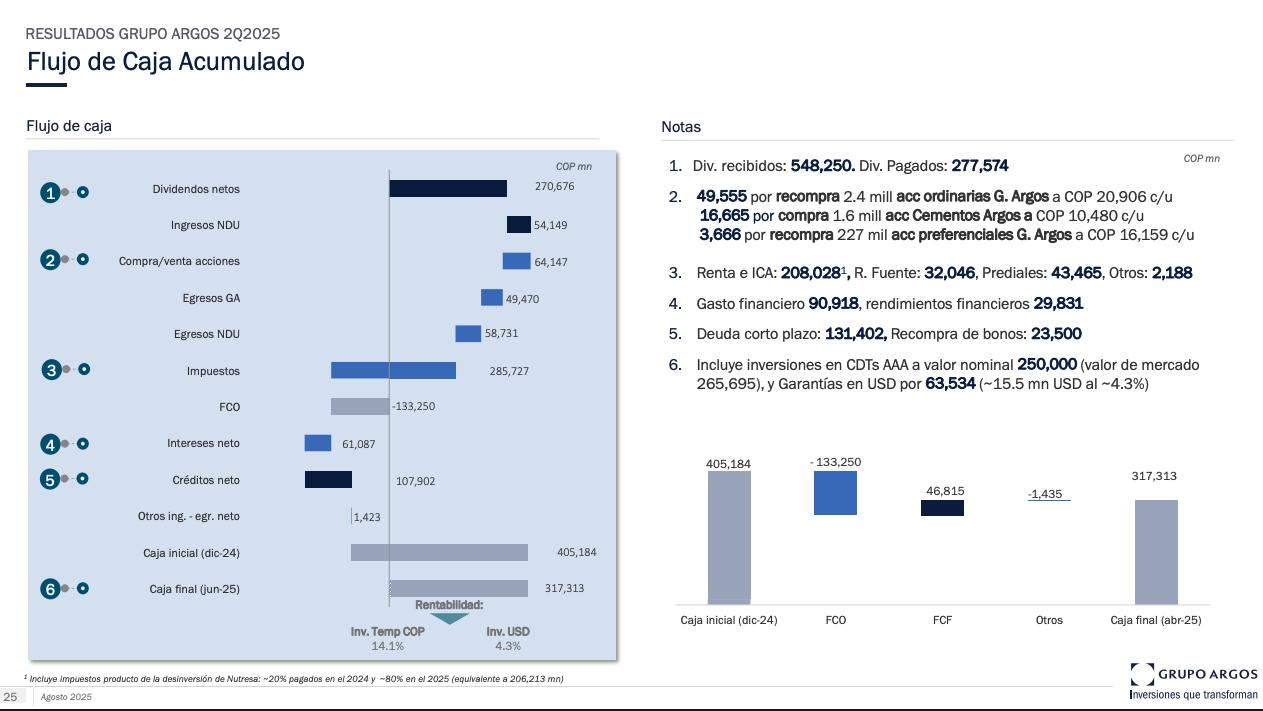


--- Results for Inference 4 ---
Prompt: <image>
identify all objects in the image and output them in bounding boxes.

Markdown Result:



Image with Bounding Boxes:


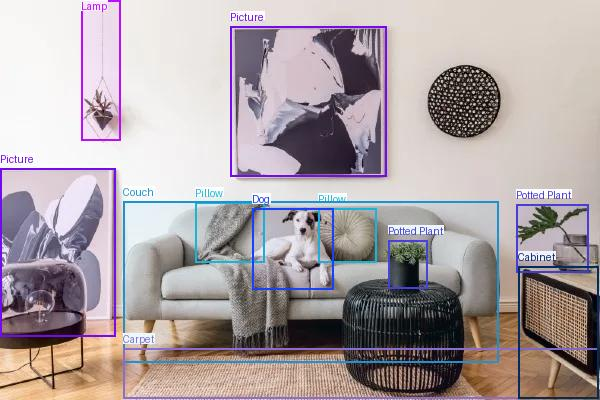


--- Results for Inference 5 ---
Prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


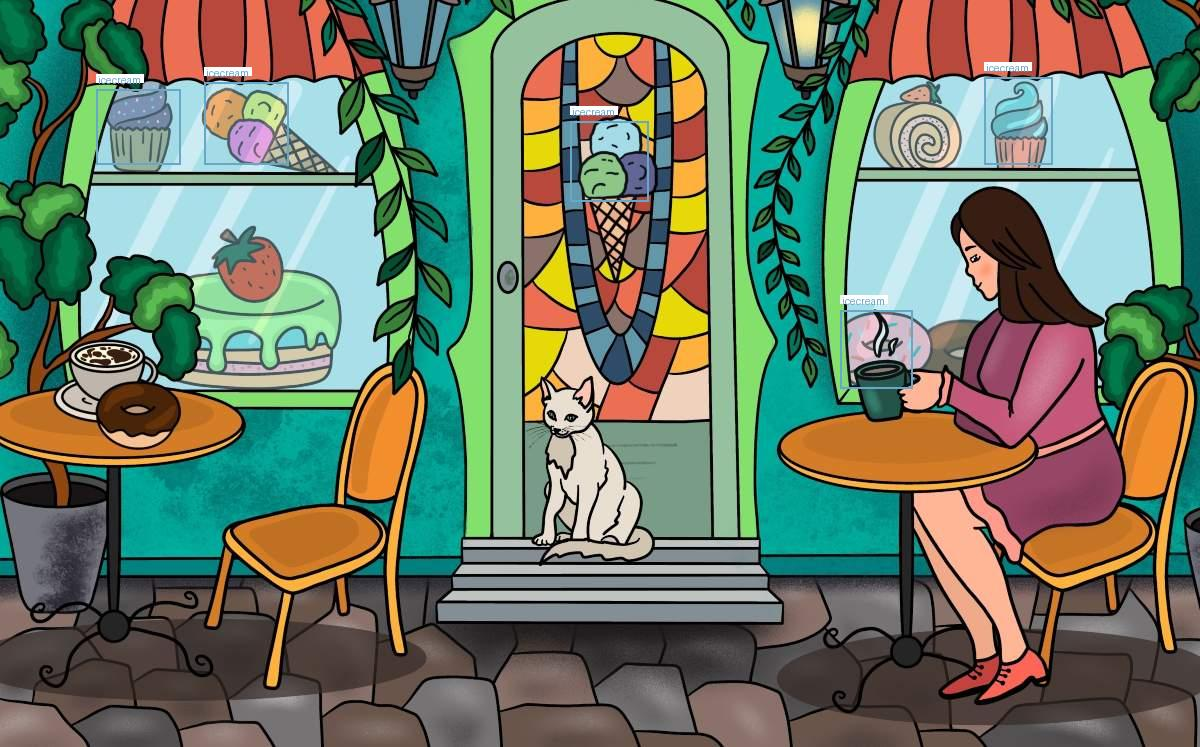


--- Results for Inference 6 ---
Prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


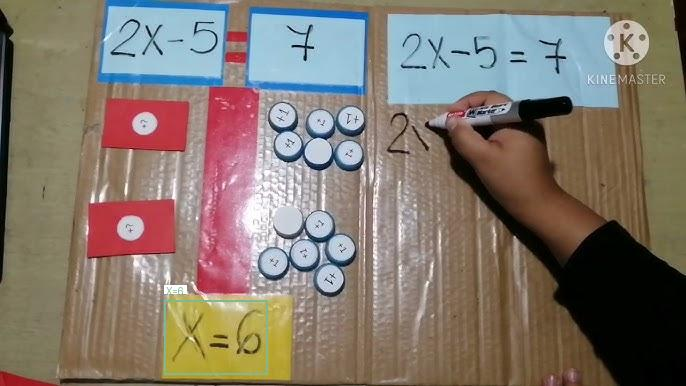


--- Results for Inference 7 ---
Prompt: <image>
Describe this image in detail.

Markdown Result:


A financial chart of the S&P 500 index. The chart is in a candlestick format, with each candlestick representing a one-day period. The candlesticks are color-coded based on the percentage change in the index's value. The chart is also annotated with several technical indicators, including the moving average convergence divergence (MACD) indicator and the relative strength index (RSI) indicator. The chart is set against a white background with a black grid. The font used in the chart is Arial.


Image with Bounding Boxes:


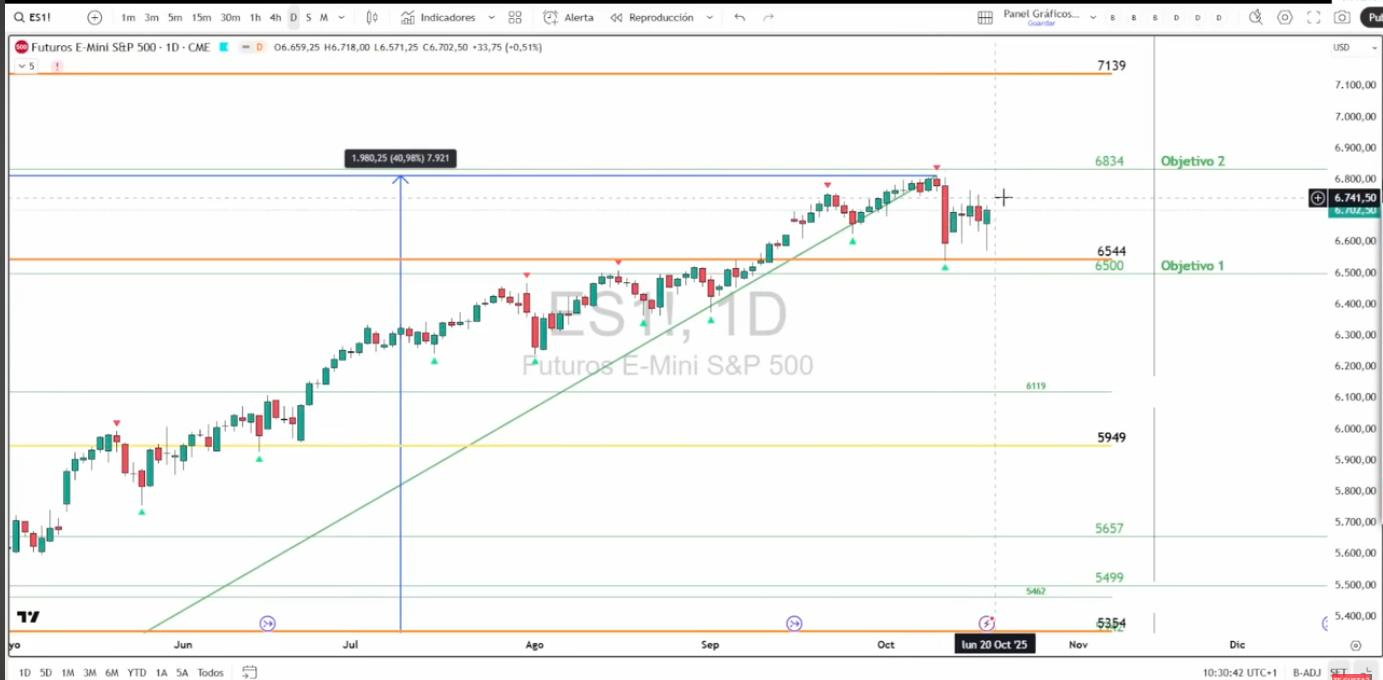

In [26]:
from IPython.display import display, Markdown, Image
import os

for i, result in enumerate(inference_results):
    print(f"\n--- Results for Inference {i+1} ---")
    print(f"Prompt: {result['prompt']}") # Display the prompt
    output_path = result['output_path']

    # Construct paths for markdown and image files
    markdown_file_path = os.path.join(output_path, 'result.mmd')
    image_file_path = os.path.join(output_path, 'result_with_boxes.jpg')

    # Display markdown content
    print("\nMarkdown Result:")
    try:
        with open(markdown_file_path, 'r') as f:
            markdown_content = f.read()
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"Error: The markdown file was not found at {markdown_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the markdown file: {e}")

    # Display image with bounding boxes
    print("\nImage with Bounding Boxes:")
    try:
        display(Image(filename=image_file_path))
    except FileNotFoundError:
        print(f"Error: The image file was not found at {image_file_path}")
    except Exception as e:
        print(f"An error occurred while displaying the image: {e}")